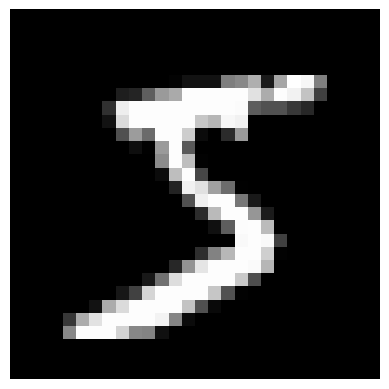

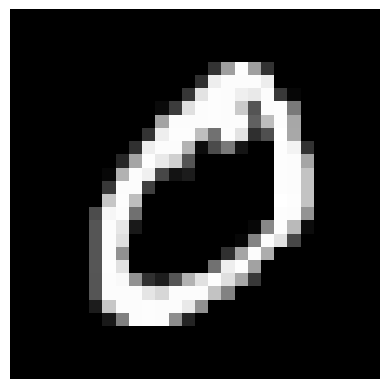

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8808 - loss: 0.4088
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.9690 - loss: 0.1046
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9774 - loss: 0.0731
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9837 - loss: 0.0507
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.9868 - loss: 0.0404
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9709 - loss: 0.0971
Test accuracy: 0.9766
Label: 7


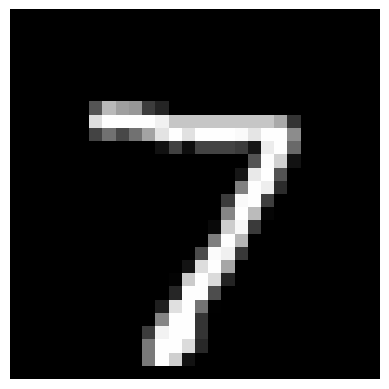

Label: 2


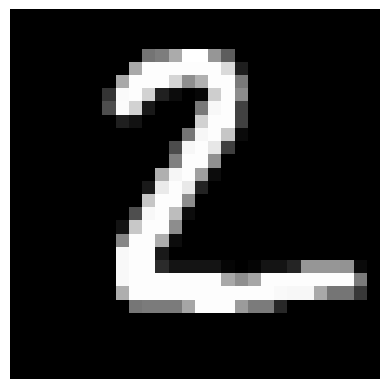

Label: 1


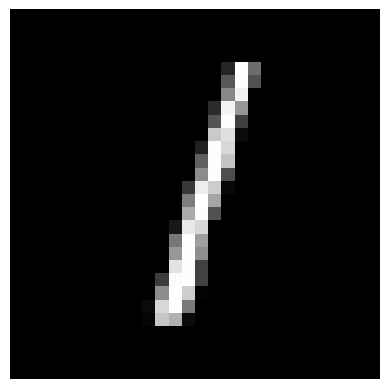

Label: 0


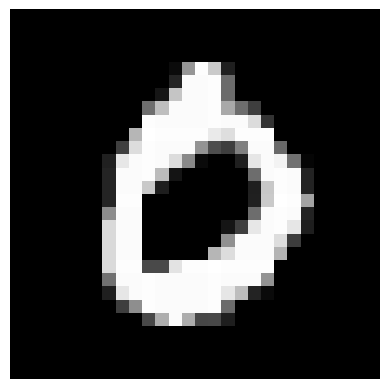

Label: 4


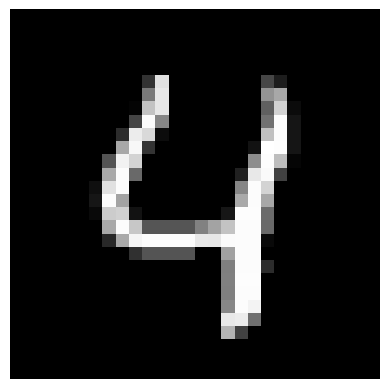

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictions:
[7 2 1 0 4]


In [ ]:
# Neural networks for handwriting binary digit recognition
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


def loadMNIST():
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Preprocess the data
    x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0
    x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0
    
    return (x_train, y_train), (x_test, y_test)

def showImage(image):
    # Display an image
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show() 

if __name__ == "__main__":
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = loadMNIST()
    
    # Show the first image in the training set
    showImage(x_train[0])
    showImage(x_train[1])
    
    # Create a simple neural network model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        # using softmax activation for multi-class classification
        # softmax is a generalization of the logistic function to multiple classes
        # output layer with 10 units for the 10 digit classes
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(x_train, y_train, epochs=5, batch_size=32)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc:.4f}')

    for i in range(5):
        print(f"Label: {y_test[i]}")
        showImage(x_test[i])
    predictions = model.predict(x_test[:5])
    print("Predictions:")
    print(np.argmax(predictions, axis=1))
